<a href="https://colab.research.google.com/github/DeathSlayer1707/random_gigs/blob/main/DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
from tensorflow.keras.datasets import mnist

mnist dataset - It is a famous dataset of handwritten digits (0 to 9), used to train and test image classification models.

In [37]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

The pixel values are stored as integers from 0-255.
We normalise the data.

In [38]:
X_train = X_train/255
X_test = X_test/255
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

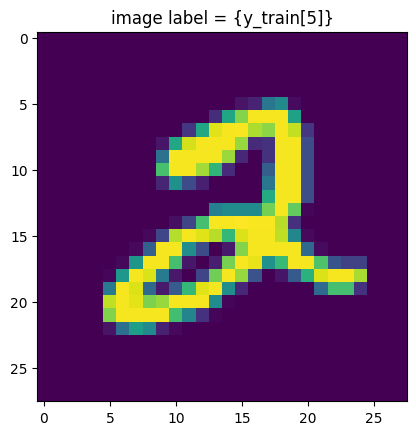

image label = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
plt.imshow(X_train[5])
plt.title("image label = {y_train[5]}")
plt.show()

print(f"image label = {y_train[5]}")

In [40]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

Dense - Fully connected NN with 5 neurons

We would have used sigmoid at last if it was binary classification , since it is multi layer we use softmax.


In [41]:
model = Sequential([
    Flatten(input_shape=(28,28)), # imput layer
    Dense(5,activation="relu"),   # hidden layer
    Dense(10,activation="softmax") # output layer
])

why output layer has 10 neurons?

In [42]:
np.unique(y_train)

array([0., 1.])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

epoch = iterations;
batch_size = how many training sets in one epoch;
verbose = info shown

In [45]:
model.fit(X_train,y_train,epochs=5,validation_split=0.2,batch_size=32,verbose=2)

Epoch 1/5
1500/1500 - 10s - 7ms/step - accuracy: 0.6049 - loss: 1.1842 - val_accuracy: 0.7630 - val_loss: 0.7911
Epoch 2/5
1500/1500 - 5s - 4ms/step - accuracy: 0.7868 - loss: 0.7118 - val_accuracy: 0.8426 - val_loss: 0.5414
Epoch 3/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8510 - loss: 0.5241 - val_accuracy: 0.8717 - val_loss: 0.4559
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8702 - loss: 0.4701 - val_accuracy: 0.8780 - val_loss: 0.4297
Epoch 5/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8754 - loss: 0.4492 - val_accuracy: 0.8841 - val_loss: 0.4140


In [46]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8674 - loss: 0.4770


[0.4273051619529724, 0.8819000124931335]

In [47]:
model.save("mnist.h5")

In [48]:
model.get_weights()

[array([[ 0.07520334, -0.02814436,  0.0506269 , -0.02591913,  0.07190999],
        [ 0.02072214,  0.08259611, -0.04730168, -0.04409707, -0.04634225],
        [ 0.02865028, -0.04262938,  0.01838015,  0.06843513,  0.0834306 ],
        ...,
        [-0.03544837,  0.0817482 ,  0.01807278,  0.03831089,  0.01057061],
        [ 0.0645134 ,  0.01545323, -0.06739146, -0.0159961 ,  0.05843973],
        [-0.02573808,  0.06710652, -0.06760418,  0.00167339, -0.05018012]],
       dtype=float32),
 array([ 0.57229555,  0.29722926,  0.7776735 ,  0.22035028, -0.19941127],
       dtype=float32),
 array([[ 0.8919766 , -0.3847329 , -0.27236307, -0.32350808, -0.4789976 ,
          0.07619076, -0.63343346,  0.33475116, -1.2412472 , -0.7939948 ],
        [-0.65578914, -1.185135  , -0.945525  , -0.19853935, -0.5702833 ,
         -0.5512249 ,  0.00911495,  0.4316641 , -0.2040977 ,  0.34883627],
        [-0.34331596, -0.558042  , -0.9281952 , -0.5069391 ,  1.3751506 ,
          0.415229  , -1.0272319 , -0.715131

COMPLEX NEURAL NETS

In [49]:
from keras.models import Model
from keras.layers import Input, Dense,Flatten, concatenate

Here in this architecture we are creating parellel layers and the they will be concatenated at the end.

In [50]:
input_layer = Input(shape=(28,28))
flatten = Flatten(input_shape = (28,28))(input_layer)
hidden1 = Dense(128,activation="relu")(flatten)
hidden2 = Dense(256,activation="relu")(flatten)
hidden11 = Dense(64,activation="relu")(hidden1)
merge = concatenate([hidden11,hidden2])
output_layer = Dense(10,activation="softmax")(merge)

In [51]:
model = Model(inputs=input_layer,outputs=output_layer)

In [52]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 784)       │          0 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │    100,480 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      8,256 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 256)       │    200,960 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 320)       │          0 │ dense_22[0][0],   │
│ (Concatenate)       │                   │            │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 10)        │      3,210 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 312,906 (1.19 MB)

 Trainable params: 312,906 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

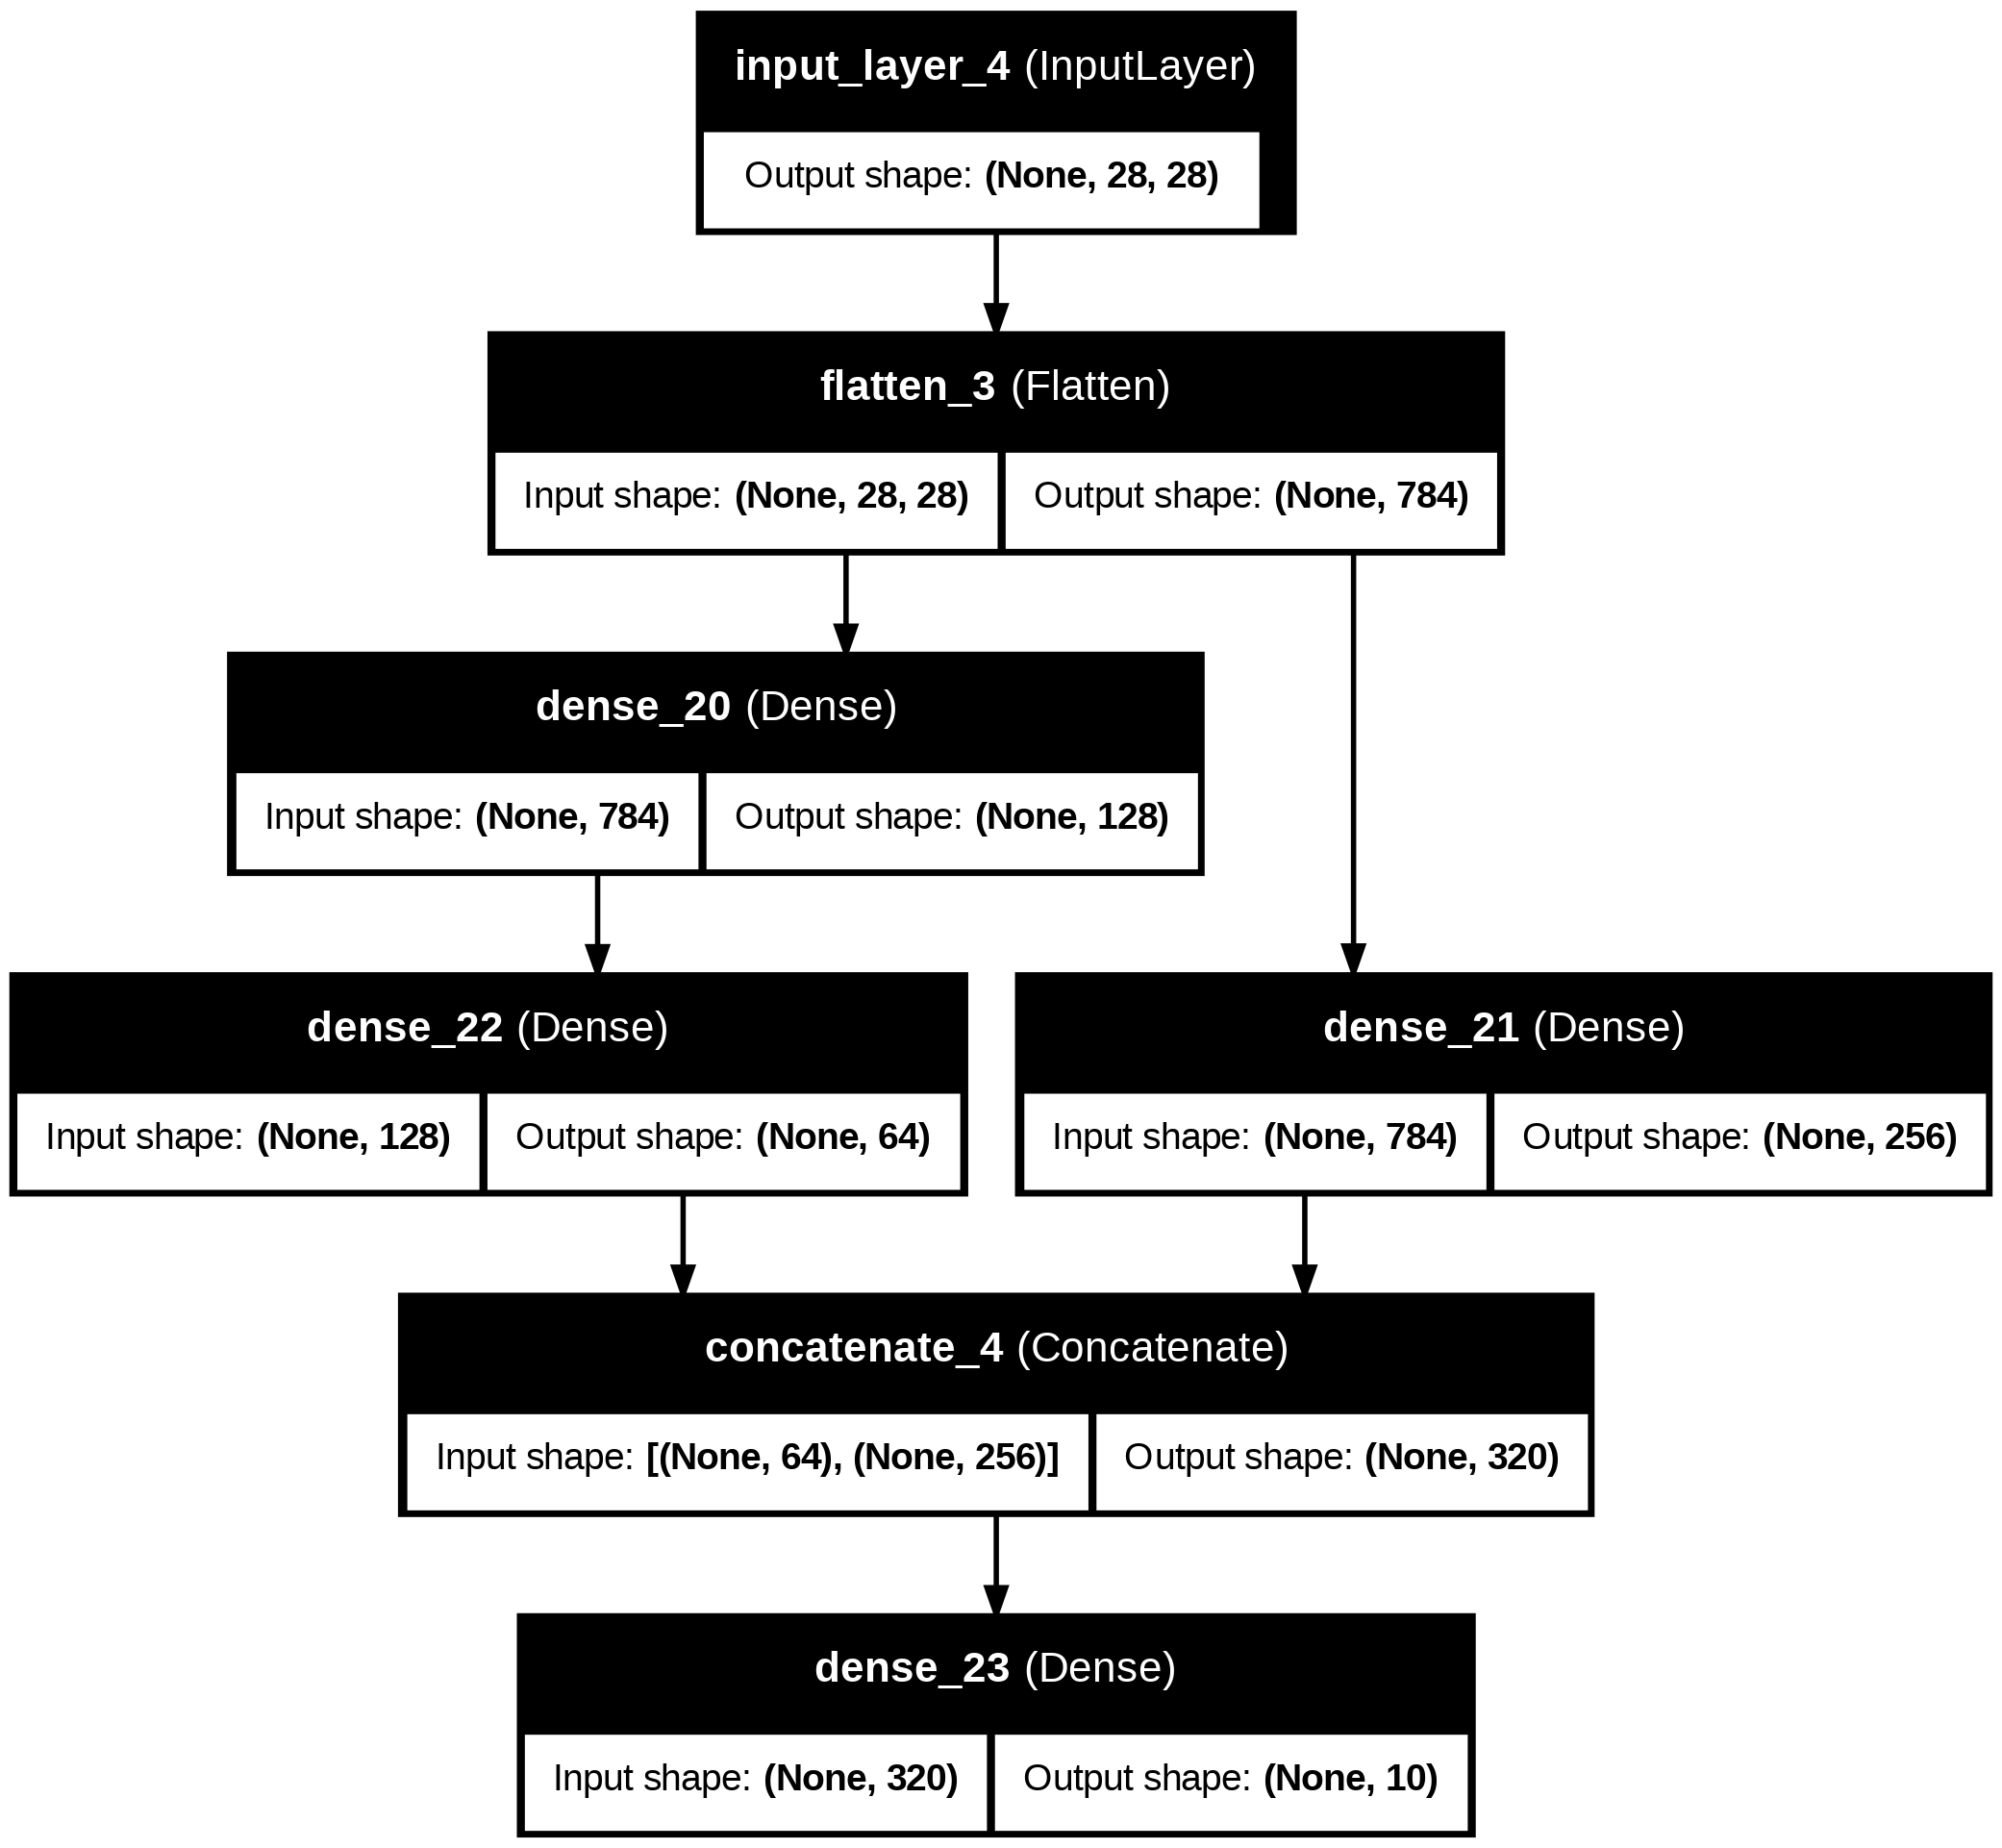

In [53]:
from keras.utils import plot_model

plot_model(model,show_shapes=True,show_layer_names=True)

In [54]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,validation_split=0.2,batch_size=32,verbose=2)

Epoch 1/5
1500/1500 - 6s - 4ms/step - accuracy: 0.9326 - loss: 0.2309 - val_accuracy: 0.9638 - val_loss: 0.1173
Epoch 2/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9710 - loss: 0.0916 - val_accuracy: 0.9716 - val_loss: 0.0891
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9756 - val_loss: 0.0826
Epoch 4/5
1500/1500 - 5s - 4ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9770 - val_loss: 0.0765
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9893 - loss: 0.0321 - val_accuracy: 0.9733 - val_loss: 0.0994


In [55]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.1045


[0.08331568539142609, 0.9776999950408936]